In [300]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sb

In [301]:
mitra2010 = pd.read_excel("SOMITRA 2020 DATA.xlsx")
mitra2010 

,COUNTRY,ABBREV,CONTINENT,TOTPOP,COUNT_REF,REFPER,F_TODDLER,F_CHILD,F_TEEN,F_ADULT,...,M_CHILD,M_TEEN,M_ADULT,M_SENIOR,M_OTHER,M_TOTAL,TOTREF,BATLDET,GPI,MILITARY
0,Afghanistan,AFG,Asia,41128771,5661717,0.137658,766188,945375,684775,1999126,...,976994,746835,2211297,240836,242046,5198777,10179326,899.0,3.545,2.455
1,Albania,ALB,Europe,2777689,20865,0.007512,156,317,281,1576,...,377,250,1802,92,6672,9369,55271,NaN,1.764,1.657
2,Algeria,DZA,Africa,44903225,7734,0.000172,131,186,110,988,...,207,195,3898,70,4406,8919,16764,NaN,2.126,2.015
3,Angola,AGO,Africa,35588987,12021,0.000338,1092,2121,1622,5027,...,2034,1611,4166,768,3971,13655,41859,20.0,1.970,1.682
4,Argentina,ARG,South America,46234830,194,0.000004,79,36,15,150,...,39,23,212,5,481,808,2470,NaN,1.904,1.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Venezuela (Bolivarian Republic of),VEN,South America,28301696,230393,0.008141,216080,269570,377676,2164403,...,264498,345377,1843934,132382,547510,3348484,9973118,NaN,2.683,2.045
147,Viet Nam,VNM,Africa,98186856,17507,0.000178,102,183,149,1813,...,204,170,2059,402,4911,7840,28202,NaN,1.789,1.750
148,Yemen,YEM,Asia,33696614,40147,0.001191,1767,2936,2452,10960,...,3131,2839,25633,1162,2299248,2333812,4596721,2896.0,3.404,2.377
149,Zambia,ZMB,Africa,20017675,296,0.000015,0,0,10,142,...,5,5,109,0,7,126,772,NaN,1.871,1.510


In [302]:
#CONTINENT PROFILING
profile = pd.DataFrame(mitra2010,columns = ['COUNTRY','CONTINENT','TOTPOP','COUNT_REF','REFPER'])
profile

,COUNTRY,CONTINENT,TOTPOP,COUNT_REF,REFPER
0,Afghanistan,Asia,41128771,5661717,0.137658
1,Albania,Europe,2777689,20865,0.007512
2,Algeria,Africa,44903225,7734,0.000172
3,Angola,Africa,35588987,12021,0.000338
4,Argentina,South America,46234830,194,0.000004
...,...,...,...,...,...
146,Venezuela (Bolivarian Republic of),South America,28301696,230393,0.008141
147,Viet Nam,Africa,98186856,17507,0.000178
148,Yemen,Asia,33696614,40147,0.001191
149,Zambia,Africa,20017675,296,0.000015


In [303]:
country = pd.crosstab(index = profile['CONTINENT'], columns = 'count')
country

col_0,count
CONTINENT,
Africa,42
Asia,44
Australia/Oceania,11
Europe,22
Europe/Asia,1
North America,16
South America,14


In [277]:
#GROUPING BY CONTINENTS
continentgrp = mitra2010.groupby('CONTINENT')
asia = continentgrp.get_group('Asia')
namerica = continentgrp.get_group('North America')
samerica = continentgrp.get_group('South America')
africa = continentgrp.get_group('Africa')
europe = continentgrp.get_group('Europe')
oceania = continentgrp.get_group('Oceania')

#TOP FOR THE YEAR
mitra2010.loc[mitra2010.nlargest(5,'COUNT_REF').index].COUNTRY

133          Syrian Arab Rep.
0                 Afghanistan
127               South Sudan
96                    Myanmar
38     Dem. Rep. of the Congo
Name: COUNTRY, dtype: object

In [278]:
asia_sum = continentgrp.get_group('Asia')['COUNT_REF'].sum()
namerica_sum = continentgrp.get_group('North America')['COUNT_REF'].sum()
samerica_sum = continentgrp.get_group('South America')['COUNT_REF'].sum()
africa_sum = continentgrp.get_group('Africa')['COUNT_REF'].sum()
europe_sum = continentgrp.get_group('Europe')['COUNT_REF'].sum()
oceania_sum = continentgrp.get_group('Oceania')['COUNT_REF'].sum()

In [279]:
asia_pop = continentgrp.get_group('Asia')['TOTPOP'].sum()
namerica_pop = continentgrp.get_group('North America')['TOTPOP'].sum()
samerica_pop = continentgrp.get_group('South America')['TOTPOP'].sum()
africa_pop = continentgrp.get_group('Africa')['TOTPOP'].sum()
europe_pop = continentgrp.get_group('Europe')['TOTPOP'].sum()
oceania_pop = continentgrp.get_group('Oceania')['TOTPOP'].sum()

In [280]:
asianon = asia_pop-asia_sum
namericanon = namerica_pop-namerica_sum
samericanon = samerica_pop-samerica_sum
africanon = africa_pop-africa_sum
eunon = europe_pop-europe_sum
oceanianon = oceania_pop-oceania_sum
print(asianon,namericanon,samericanon,africanon,eunon,oceanianon)

4802307117 398454128 504044488 1291894572 672232435 62467284


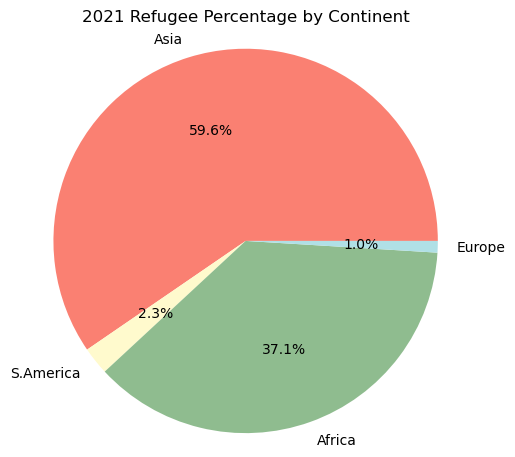

In [281]:
#PIECHARTCONTINENTS
labels = ["Asia", "S.America", "Africa", "Europe"]
value = [asia_sum, samerica_sum, africa_sum, europe_sum]

fig, ax = plt.subplots()
ax.pie(value, labels = labels, radius = 1.3, colors=["salmon","lemonchiffon","darkseagreen","powderblue"],
       autopct = '%1.1f%%', pctdistance = 0.6)
ax.set_title("2022 Refugee Percentage by Continent",pad = 25)
plt.savefig('2022 Refugee Percentage by Continent.png')

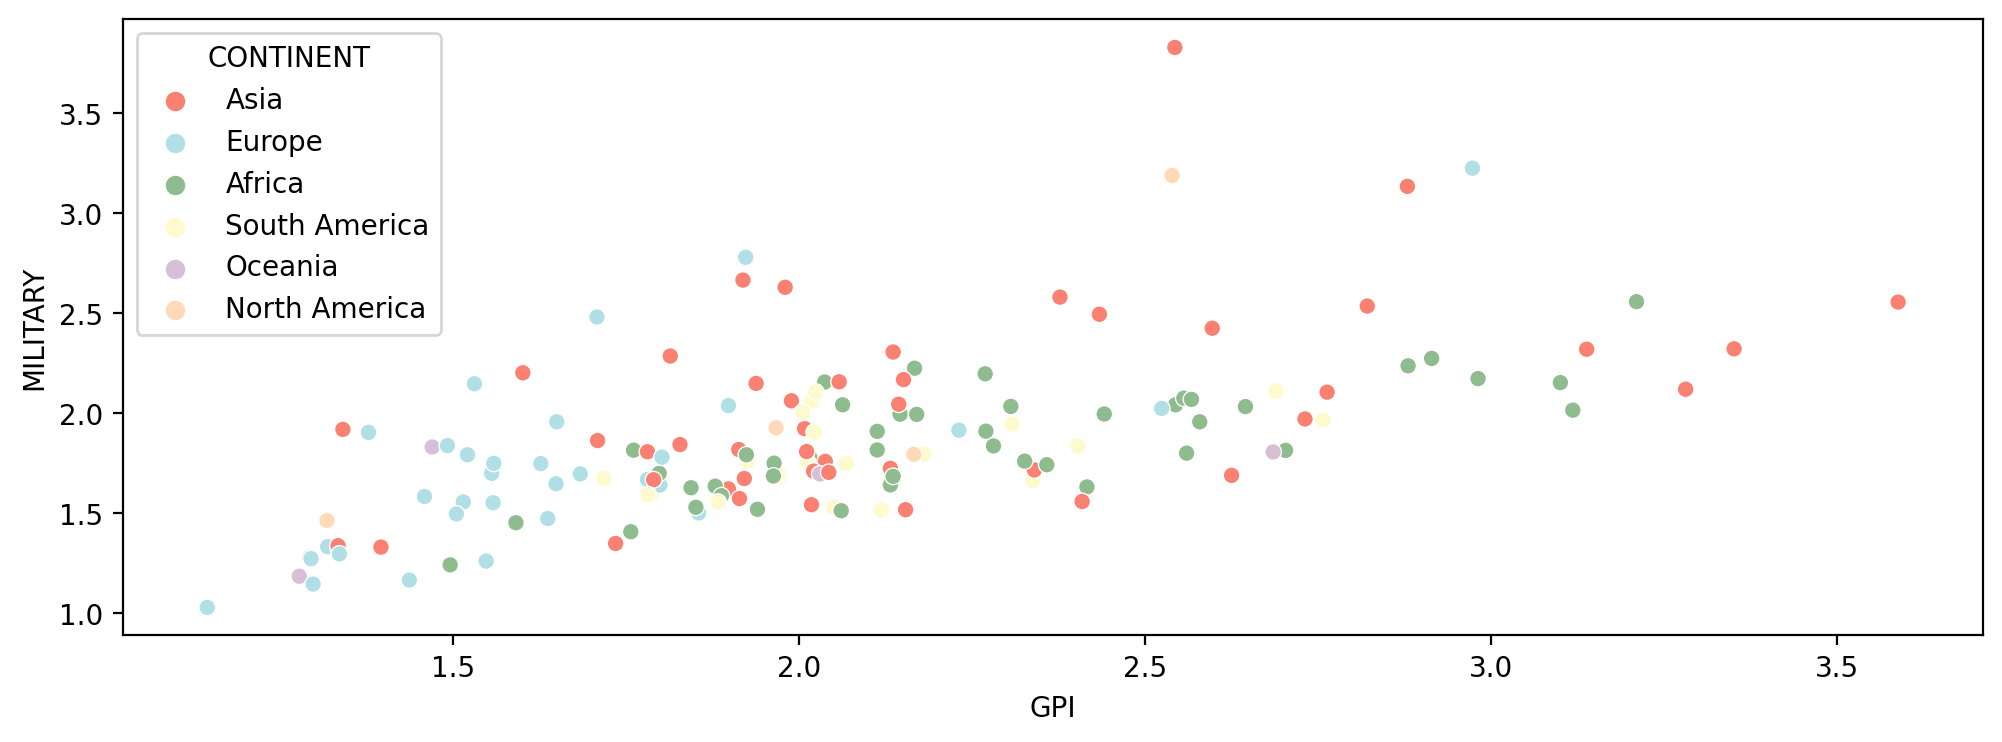

In [282]:
plt.figure(figsize = (12,4), dpi = 200)
Color_Wheel = ["salmon","powderblue","darkseagreen","lemonchiffon","thistle","peachpuff"]
sb.scatterplot(x='GPI',y='MILITARY',data = mitra2010,
              hue = 'CONTINENT', palette = Color_Wheel)
ax.ticklabel_format(style='plain', axis="y")

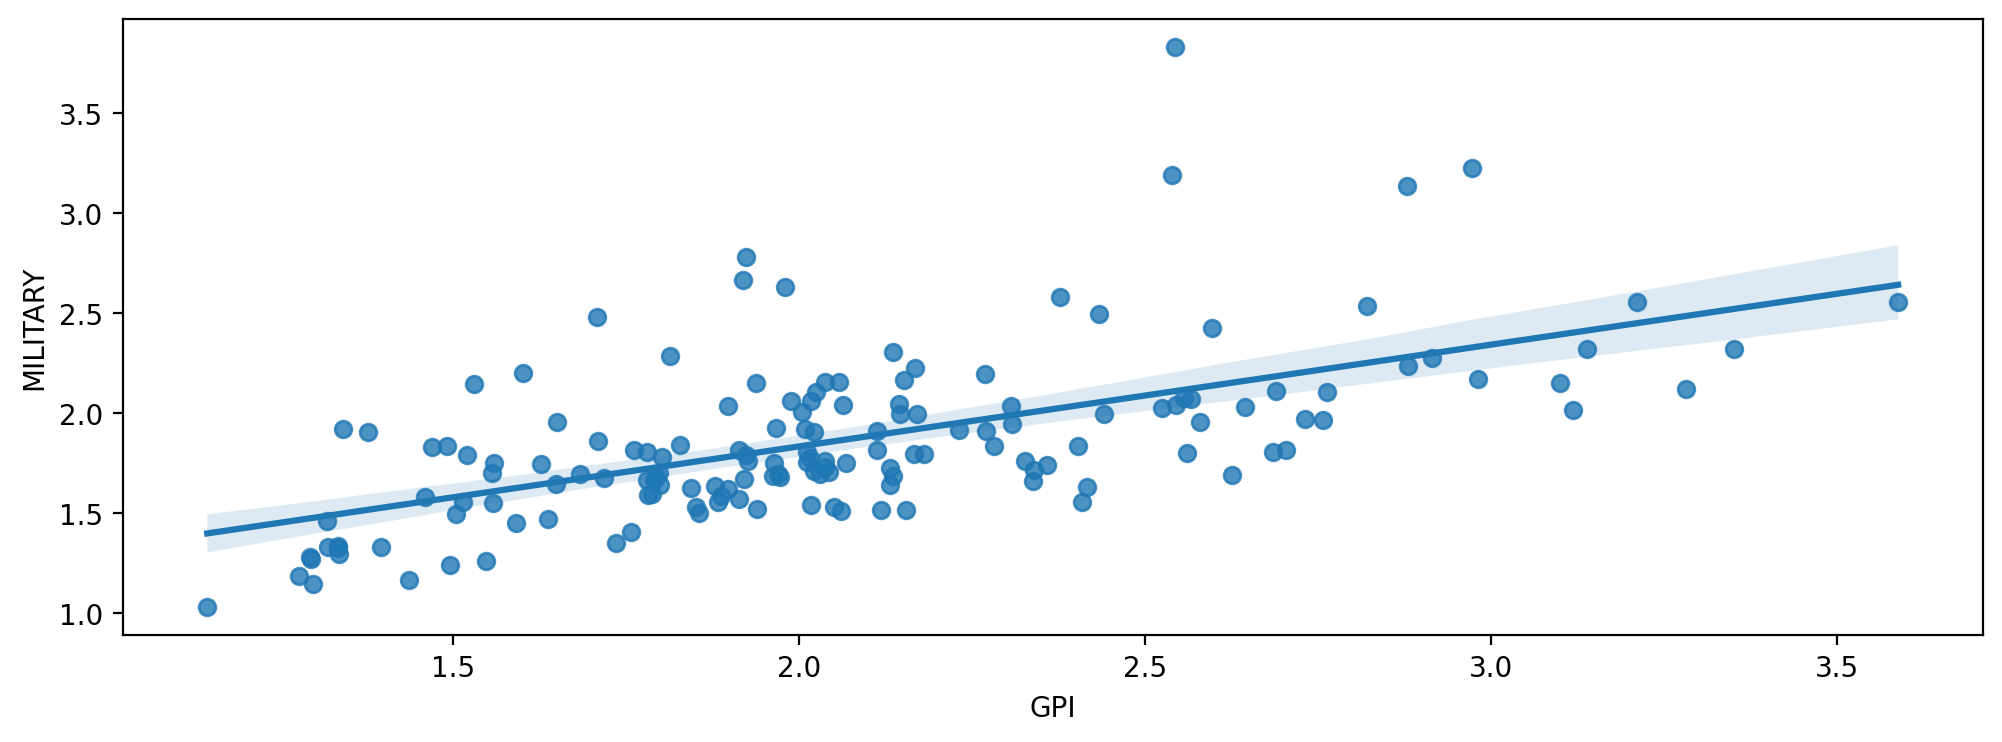

In [283]:
plt.figure(figsize = (12,4), dpi = 200)
sb.regplot(x='GPI',y='MILITARY',data = mitra2010)
ax.ticklabel_format(style='plain', axis="y")

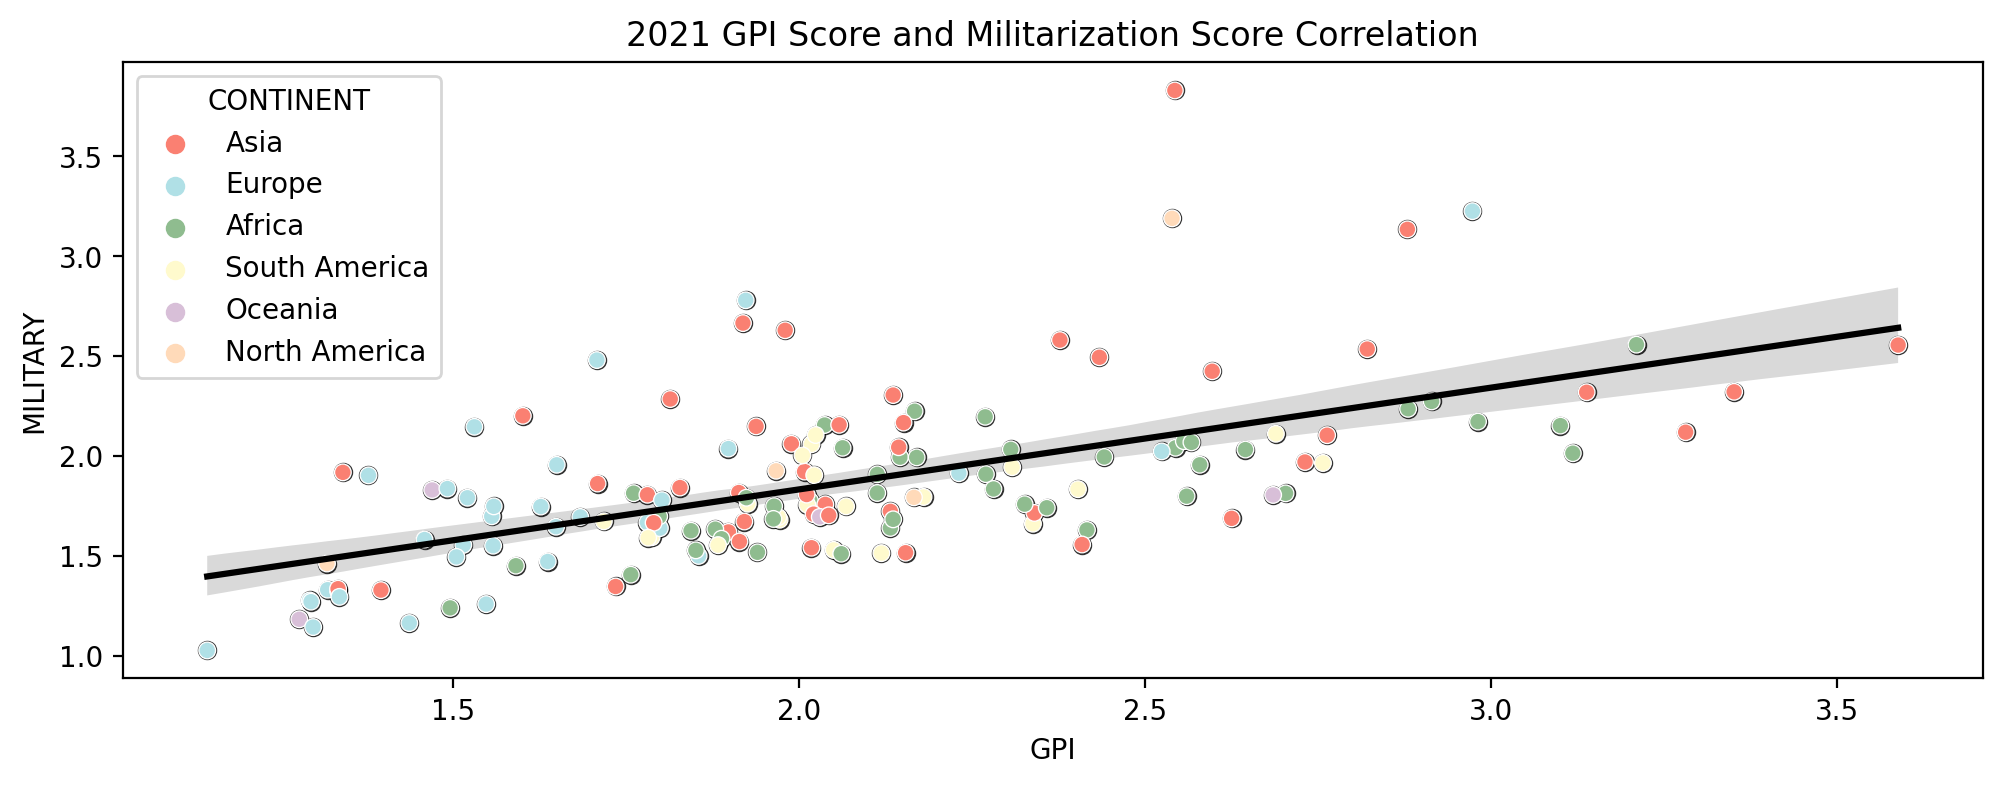

In [284]:
#LAYERING REGRESSION+SCATTERPLOTS

plt.figure(figsize = (12,4), dpi = 200)
Color_Wheel = ["salmon","powderblue","darkseagreen","lemonchiffon","thistle","peachpuff"]
sb.regplot(x='GPI',y='MILITARY',data = mitra2010,color="black")
ax.ticklabel_format(style='plain', axis="y")
Color_Wheel = ["salmon","powderblue","darkseagreen","lemonchiffon","thistle","peachpuff"]
sb.scatterplot(x='GPI',y='MILITARY',data = mitra2010,
              hue = 'CONTINENT', palette = Color_Wheel).set(title="2022 GPI Score and Militarization Score Correlation")
plt.savefig('2022 GPI Score and Militarization Score Correlation.png')

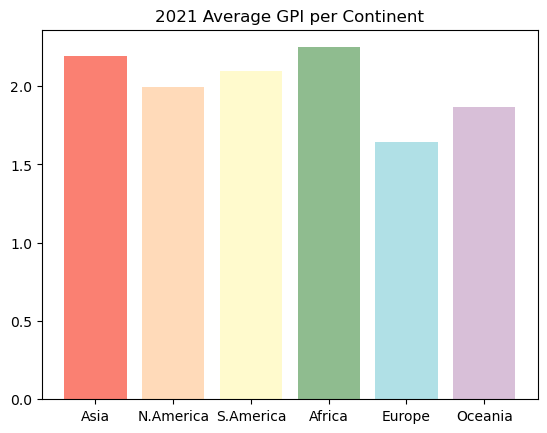

In [285]:
#AVERAGE GPI PER CONTINENT
asia_gpi = continentgrp.get_group('Asia')['GPI'].mean()
namerica_gpi = continentgrp.get_group('North America')['GPI'].mean()
samerica_gpi = continentgrp.get_group('South America')['GPI'].mean()
africa_gpi = continentgrp.get_group('Africa')['GPI'].mean()
europe_gpi = continentgrp.get_group('Europe')['GPI'].mean()
oceania_gpi = continentgrp.get_group('Oceania')['GPI'].mean()

#BAR GPI PER CONTINENT
x = ["Asia", "N.America", "S.America","Africa","Europe","Oceania"]
y = [asia_gpi, namerica_gpi, samerica_gpi, africa_gpi, europe_gpi, oceania_gpi]
colors=["salmon", "peachpuff","lemonchiffon","darkseagreen","powderblue","thistle"]

fig, ax = plt.subplots()
ax.bar(x = x, height = y, color = colors)
ax.set_title("2022 Average GPI per Continent")
plt.savefig('2022 Average GPI per Continent.png')

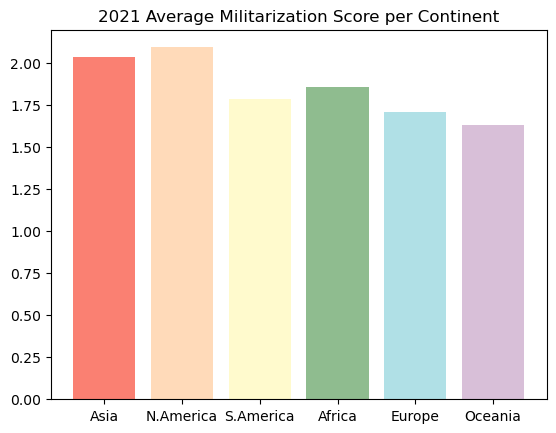

In [286]:
#AVERAGE MILITARIZATION PER CONTINENT
asia_mil = continentgrp.get_group('Asia')['MILITARY'].mean()
namerica_mil = continentgrp.get_group('North America')['MILITARY'].mean()
samerica_mil = continentgrp.get_group('South America')['MILITARY'].mean()
africa_mil = continentgrp.get_group('Africa')['MILITARY'].mean()
europe_mil = continentgrp.get_group('Europe')['MILITARY'].mean()
oceania_mil = continentgrp.get_group('Oceania')['MILITARY'].mean()

#BAR MILITARY PER CONTINENT
x = ["Asia", "N.America", "S.America","Africa","Europe","Oceania"]
y = [asia_mil, namerica_mil, samerica_mil, africa_mil, europe_mil, oceania_mil]
colors=["salmon", "peachpuff","lemonchiffon","darkseagreen","powderblue","thistle"]

fig, ax = plt.subplots()
ax.bar(x = x, height = y, color = colors)
ax.set_title("2022 Average Militarization Score per Continent")
plt.savefig('2022 Average Militarization Score per Continent.png')

In [287]:
#FEMALE PROFILING
femprofile = pd.DataFrame(mitra2010,columns = ['COUNTRY','CONTINENT','F_TODDLER','F_CHILD','F_TEEN','F_ADULT','F_SENIOR','F_OTHERS'])
femprofile

,COUNTRY,CONTINENT,F_TODDLER,F_CHILD,F_TEEN,F_ADULT,F_SENIOR,F_OTHERS
0,Afghanistan,Asia,580700,658485,478530,1332616,128756,NaN
1,Albania,Europe,144,323,218,1201,49,NaN
2,Algeria,Africa,98,152,74,731,21,NaN
3,Angola,Africa,1417,2598,1803,5751,590,NaN
4,Argentina,South America,41,10,5,103,0,NaN
...,...,...,...,...,...,...,...,...
150,Venezuela (Bolivarian Republic of),South America,105738,171573,188693,1453404,89645,NaN
151,Viet Nam,Asia,67,122,96,802,253,NaN
152,Yemen,Asia,344866,389100,431416,955199,86697,NaN
153,Zambia,Africa,0,0,18,178,0,NaN


In [288]:
femme = mitra2010.groupby('CONTINENT')
fasia = femme.get_group('Asia')
fnamerica = femme.get_group('North America')
fsamerica = femme.get_group('South America')
fafrica = femme.get_group('Africa')
feurope = femme.get_group('Europe')
foceania = femme.get_group('Oceania')

In [289]:
#asia
femasia_todsum = femme.get_group('Asia')['F_TODDLER'].sum()
femasia_chisum = femme.get_group('Asia')['F_CHILD'].sum()
femasia_teesum = femme.get_group('Asia')['F_TEEN'].sum()
femasia_adusum = femme.get_group('Asia')['F_ADULT'].sum()
femasia_sensum = femme.get_group('Asia')['F_SENIOR'].sum()
femasia_othsum = femme.get_group('Asia')['F_OTHER'].sum()
totfemasia = (femasia_todsum,femasia_chisum,femasia_teesum,femasia_adusum,femasia_sensum,femasia_othsum)
print(totfemasia)

#n.america
femnoram_todsum = femme.get_group('North America')['F_TODDLER'].sum()
femnoram_chisum = femme.get_group('North America')['F_CHILD'].sum()
femnoram_teesum = femme.get_group('North America')['F_TEEN'].sum()
femnoram_adusum = femme.get_group('North America')['F_ADULT'].sum()
femnoram_sensum = femme.get_group('North America')['F_SENIOR'].sum()
femnoram_othsum = femme.get_group('North America')['F_OTHER'].sum()
totfemnoram = (femnoram_todsum,femnoram_chisum,femnoram_teesum,femnoram_adusum,femnoram_sensum,femnoram_othsum)
print(totfemnoram)

#s.america
femsoram_todsum = femme.get_group('South America')['F_TODDLER'].sum()
femsoram_chisum = femme.get_group('South America')['F_CHILD'].sum()
femsoram_teesum = femme.get_group('South America')['F_TEEN'].sum()
femsoram_adusum = femme.get_group('South America')['F_ADULT'].sum()
femsoram_sensum = femme.get_group('South America')['F_SENIOR'].sum()
femsoram_othsum = femme.get_group('South America')['F_OTHER'].sum()
totfemsoram = (femsoram_todsum,femsoram_chisum,femsoram_teesum,femsoram_adusum,femsoram_sensum,femsoram_othsum)
print(totfemsoram)

#africa
femafri_todsum = femme.get_group('Africa')['F_TODDLER'].sum()
femafri_chisum = femme.get_group('Africa')['F_CHILD'].sum()
femafri_teesum = femme.get_group('Africa')['F_TEEN'].sum()
femafri_adusum = femme.get_group('Africa')['F_ADULT'].sum()
femafri_sensum = femme.get_group('Africa')['F_SENIOR'].sum()
femafri_othsum = femme.get_group('Africa')['F_OTHER'].sum()
totfemafri = (femafri_todsum,femafri_chisum,femafri_teesum,femafri_adusum,femafri_sensum,femafri_othsum)
print(totfemafri)

#eu
femeu_todsum = femme.get_group('Europe')['F_TODDLER'].sum()
femeu_chisum = femme.get_group('Europe')['F_CHILD'].sum()
femeu_teesum = femme.get_group('Europe')['F_TEEN'].sum()
femeu_adusum = femme.get_group('Europe')['F_ADULT'].sum()
femeu_sensum = femme.get_group('Europe')['F_SENIOR'].sum()
femeu_othsum = femme.get_group('Europe')['F_OTHER'].sum()
totfemeu = (femeu_todsum,femeu_chisum,femeu_teesum,femeu_adusum,femeu_sensum,femeu_othsum)
print(totfemeu)

#oceania
femocea_todsum = femme.get_group('Oceania')['F_TODDLER'].sum()
femocea_chisum = femme.get_group('Oceania')['F_CHILD'].sum()
femocea_teesum = femme.get_group('Oceania')['F_TEEN'].sum()
femocea_adusum = femme.get_group('Oceania')['F_ADULT'].sum()
femocea_sensum = femme.get_group('Oceania')['F_SENIOR'].sum()
femocea_othsum = femme.get_group('Oceania')['F_OTHER'].sum()
totfemocea = (femocea_todsum,femocea_chisum,femocea_teesum,femocea_adusum,femocea_sensum,femocea_othsum)
print(totfemocea)

(1496137, 1923470, 1445916, 4446591, 414091, 287423)
(22552, 32777, 31609, 137115, 18774, 205)
(209236, 495385, 600159, 3775483, 515535, 898737)
(1164583, 1751413, 1117524, 3479328, 275558, 1669859)
(2790, 4988, 4001, 18813, 4020, 1282491)
(11852, 23203, 15490, 39553, 3235, 192832)


In [290]:
totfempop = np.array([totfemasia,totfemnoram,totfemsoram,totfemafri, totfemeu,totfemocea])
totfempop

array([[1496137, 1923470, 1445916, 4446591,  414091,  287423],
       [  22552,   32777,   31609,  137115,   18774,     205],
       [ 209236,  495385,  600159, 3775483,  515535,  898737],
       [1164583, 1751413, 1117524, 3479328,  275558, 1669859],
       [   2790,    4988,    4001,   18813,    4020, 1282491],
       [  11852,   23203,   15490,   39553,    3235,  192832]])

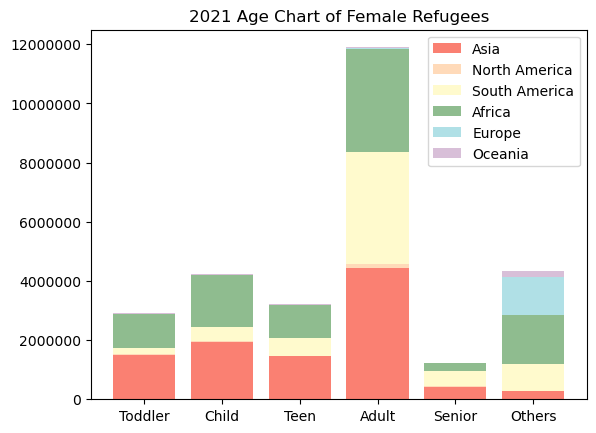

In [291]:
groups = ['Toddler', 'Child', 'Teen', 'Adult', 'Senior', 'Others']
colors = ["salmon","peachpuff","lemonchiffon","darkseagreen","powderblue","thistle"]
legend = ["Asia","North America","South America","Africa","Europe","Oceania"]


fig, ax = plt.subplots()

# Stacked bar chart with loop
for i in range(totfempop.shape[0]):
    ax.bar(groups, totfempop[i],
           bottom = np.sum(totfempop[:i], axis = 0),color=colors[i],label=legend[i])
ax.legend()
ax.set_title("2022 Age Chart of Female Refugees")
ax.ticklabel_format(style='plain', axis="y")
plt.savefig('2022 Age Chart of Female Refugees.png')

In [292]:
#MALE PROFILING
maleprofile = pd.DataFrame(mitra2010,columns = ['COUNTRY','CONTINENT','M_TODDLER','M_CHILD','M_TEEN','M_ADULT','M_SENIOR','M_OTHERS'])
maleprofile

,COUNTRY,CONTINENT,M_TODDLER,M_CHILD,M_TEEN,M_ADULT,M_SENIOR,M_OTHERS
0,Afghanistan,Asia,590640,675840,518799,1469392,157696,NaN
1,Albania,Europe,199,346,220,1294,60,NaN
2,Algeria,Africa,126,161,130,2415,59,NaN
3,Angola,Africa,1458,2484,1863,4835,1032,NaN
4,Argentina,South America,26,9,10,126,8,NaN
...,...,...,...,...,...,...,...,...
150,Venezuela (Bolivarian Republic of),South America,112307,179262,183571,1293851,70495,NaN
151,Viet Nam,Asia,68,131,107,1058,317,NaN
152,Yemen,Asia,344837,432166,431764,841455,86984,NaN
153,Zambia,Africa,0,0,10,102,0,NaN


In [293]:
male = mitra2010.groupby('CONTINENT')
masia = male.get_group('Asia')
mnamerica = male.get_group('North America')
msamerica = male.get_group('South America')
mafrica = male.get_group('Africa')
meurope = male.get_group('Europe')
moceania = male.get_group('Oceania')

In [294]:
#asia
malasia_todsum = male.get_group('Asia')['M_TODDLER'].sum()
malasia_chisum = male.get_group('Asia')['M_CHILD'].sum()
malasia_teesum = male.get_group('Asia')['M_TEEN'].sum()
malasia_adusum = male.get_group('Asia')['M_ADULT'].sum()
malasia_sensum = male.get_group('Asia')['M_SENIOR'].sum()
malasia_othsum = male.get_group('Asia')['M_OTHER'].sum()
totmalasia = (malasia_todsum,malasia_chisum,malasia_teesum,malasia_adusum,malasia_sensum,malasia_othsum)
print(totmalasia)

#n.america
malnoram_todsum = male.get_group('North America')['M_TODDLER'].sum()
malnoram_chisum = male.get_group('North America')['M_CHILD'].sum()
malnoram_teesum = male.get_group('North America')['M_TEEN'].sum()
malnoram_adusum = male.get_group('North America')['M_ADULT'].sum()
malnoram_sensum = male.get_group('North America')['M_SENIOR'].sum()
malnoram_othsum = male.get_group('North America')['M_OTHER'].sum()
totmalnoram= (malnoram_todsum,malnoram_chisum,malnoram_teesum,malnoram_adusum,malnoram_sensum,malnoram_othsum)
print(totmalnoram)

#s.america
malsoram_todsum = male.get_group('South America')['M_TODDLER'].sum()
malsoram_chisum = male.get_group('South America')['M_CHILD'].sum()
malsoram_teesum = male.get_group('South America')['M_TEEN'].sum()
malsoram_adusum = male.get_group('South America')['M_ADULT'].sum()
malsoram_sensum = male.get_group('South America')['M_SENIOR'].sum()
malsoram_othsum = male.get_group('South America')['M_OTHER'].sum()
totmalsoram = (malsoram_todsum,malsoram_chisum,malsoram_teesum,malsoram_adusum,malsoram_sensum,malsoram_othsum)
print(totmalsoram)

#africa
malafri_todsum = male.get_group('Africa')['M_TODDLER'].sum()
malafri_chisum = male.get_group('Africa')['M_CHILD'].sum()
malafri_teesum = male.get_group('Africa')['M_TEEN'].sum()
malafri_adusum = male.get_group('Africa')['M_ADULT'].sum()
malafri_sensum = male.get_group('Africa')['M_SENIOR'].sum()
malafri_othsum = male.get_group('Africa')['M_OTHER'].sum()
totmalafri = (malafri_todsum,malafri_chisum,malafri_teesum,malafri_adusum,malafri_sensum,malafri_othsum)
print(totmalafri)

#eu
maleu_todsum = male.get_group('Europe')['M_TODDLER'].sum()
maleu_chisum = male.get_group('Europe')['M_CHILD'].sum()
maleu_teesum = male.get_group('Europe')['M_TEEN'].sum()
maleu_adusum = male.get_group('Europe')['M_ADULT'].sum()
maleu_sensum = male.get_group('Europe')['M_SENIOR'].sum()
maleu_othsum = male.get_group('Europe')['M_OTHER'].sum()
totmaleu = (maleu_todsum,maleu_chisum,maleu_teesum,maleu_adusum,maleu_sensum,maleu_othsum)
print(totmaleu)

#oceania
malocea_todsum = male.get_group('Oceania')['M_TODDLER'].sum()
malocea_chisum = male.get_group('Oceania')['M_CHILD'].sum()
malocea_teesum = male.get_group('Oceania')['M_TEEN'].sum()
malocea_adusum = male.get_group('Oceania')['M_ADULT'].sum()
malocea_sensum = male.get_group('Oceania')['M_SENIOR'].sum()
malocea_othsum = male.get_group('Oceania')['M_OTHER'].sum()
totmalocea = (malocea_todsum,malocea_chisum,malocea_teesum,malocea_adusum,malocea_sensum,malocea_othsum)
print(totmalocea)

(1537669, 2035485, 1535174, 4933449, 421155, 444797)
(21264, 31702, 41411, 166709, 17606, 299)
(221816, 510995, 612542, 3738869, 512679, 860673)
(1199022, 1861141, 1146954, 3360156, 272980, 1502777)
(3048, 5447, 4248, 19108, 3917, 1103326)
(11704, 22810, 15063, 29037, 3196, 158587)


In [295]:
totmalpop = np.array([totmalasia,totmalnoram,totmalsoram,totmalafri, totmaleu,totmalocea])
totmalpop

array([[1537669, 2035485, 1535174, 4933449,  421155,  444797],
       [  21264,   31702,   41411,  166709,   17606,     299],
       [ 221816,  510995,  612542, 3738869,  512679,  860673],
       [1199022, 1861141, 1146954, 3360156,  272980, 1502777],
       [   3048,    5447,    4248,   19108,    3917, 1103326],
       [  11704,   22810,   15063,   29037,    3196,  158587]])

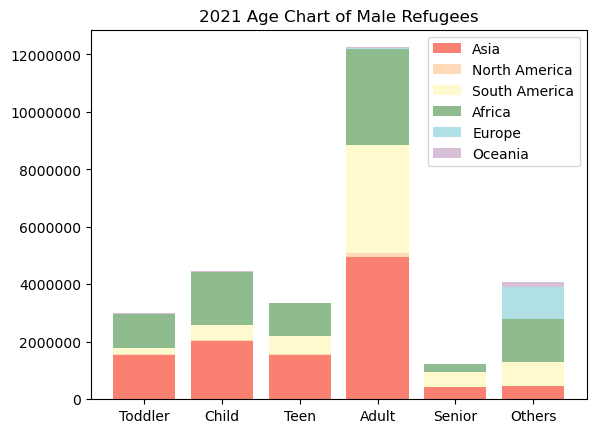

In [296]:
groups = ['Toddler', 'Child', 'Teen', 'Adult', 'Senior', 'Others']
colors = ["salmon","peachpuff","lemonchiffon","darkseagreen","powderblue","thistle"]
legend = ["Asia","North America","South America","Africa","Europe","Oceania"]


fig, ax = plt.subplots()

# Stacked bar chart with loop
for i in range(totmalpop.shape[0]):
    ax.bar(groups, totmalpop[i],
           bottom = np.sum(totmalpop[:i], axis = 0),color=colors[i],label=legend[i])
ax.legend()
ax.set_title("2022 Age Chart of Male Refugees")
ax.ticklabel_format(style='plain', axis="y")
plt.savefig('2022 Age Chart of Male Refugees.png')

In [297]:
#GPI HEATMAP
gpi = pd.read_excel("SOMITRA 2020 DATA.xlsx")
gpi = gpi[{'GPI', 'TOTPOP','COUNT_REF','F_TOTAL','M_TOTAL','BATLDET','MILITARY'}]

/var/folders/8y/c6k29qrd3qvfld6r1p5vg2zr0000gn/T/ipykernel_29563/1964977062.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gpi = gpi[{'GPI', 'TOTPOP','COUNT_REF','F_TOTAL','M_TOTAL','BATLDET','MILITARY'}]


In [298]:
cor_gpirefper = gpi.corr()
cor_gpirefper

,BATLDET,MILITARY,M_TOTAL,COUNT_REF,TOTPOP,GPI,F_TOTAL
BATLDET,1.000000,0.198594,0.532446,0.255083,-0.063366,0.560587,0.532119
MILITARY,0.198594,1.000000,0.204314,0.157562,0.179206,0.598333,0.205899
M_TOTAL,0.532446,0.204314,1.000000,0.656092,-0.025593,0.552784,0.995752
COUNT_REF,0.255083,0.157562,0.656092,1.000000,-0.002233,0.434093,0.616003
TOTPOP,-0.063366,0.179206,-0.025593,-0.002233,1.000000,0.117682,-0.028570
GPI,0.560587,0.598333,0.552784,0.434093,0.117682,1.000000,0.557657
F_TOTAL,0.532119,0.205899,0.995752,0.616003,-0.028570,0.557657,1.000000


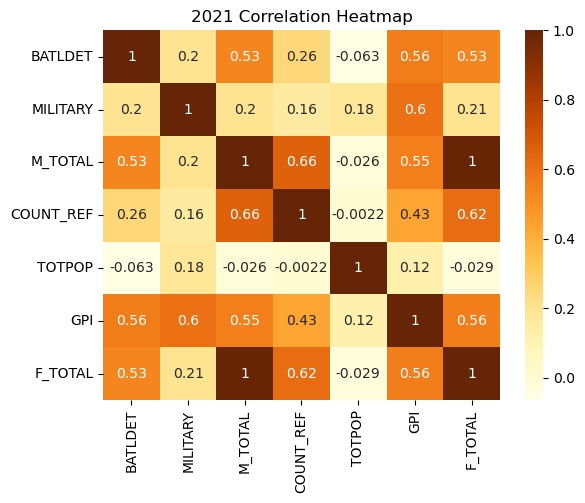

In [299]:
sb.color_palette("YlOrBr", as_cmap=True)
sb.heatmap(cor_gpirefper,
           cmap = "YlOrBr", annot=True).set(title = "2022 Correlation Heatmap")

plt.savefig('2022 Correlation Heatmap.png')